#  Importation de données

Importation de nos librairies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

Lors de l'importation un message d'erreur (extension non reconnue) s'affiche. Nous allons l'ignorer car  dans notre cas de figure cela ne modifie pas les données et n'affecte pas notre analyse.

In [2]:
warnings.filterwarnings('ignore')

Importation de nos DF

In [3]:
erp = pd.read_excel("erp.xlsx")
erp.sort_values('onsale_web', ascending = False)

,product_id,onsale_web,price,stock_quantity,stock_status
0,3847,1,24.2,0,outofstock
510,5474,1,42.0,0,outofstock
501,5397,1,24.0,6,instock
502,5398,1,39.0,10,instock
503,5439,1,13.2,0,outofstock
...,...,...,...,...,...
664,5957,0,39.0,0,outofstock
470,5018,0,15.4,0,outofstock
541,5560,0,47.0,62,instock
540,5559,0,27.9,3,instock


In [4]:

# Vérification du nombre de ligne/colonnes entre notre DF et nos fichier CSV. L'importation s'effectue correctement s'il est identique.


In [5]:
erp.shape

(825, 5)

In [6]:

# Vérification systématique du type de chaque variable pour les opérations futures


In [7]:
erp.dtypes

product_id          int64
onsale_web          int64
price             float64
stock_quantity      int64
stock_status       object
dtype: object

In [8]:
liaison = pd.read_excel("liaison.xlsx")
liaison

,product_id,id_web
0,3847,15298
1,3849,15296
2,3850,15300
3,4032,19814
4,4039,19815
...,...,...
820,7203,NaN
821,7204,NaN
822,7247,13127-1
823,7329,14680-1


In [9]:
liaison.shape

(825, 2)

In [10]:
liaison.dtypes

product_id     int64
id_web        object
dtype: object

In [11]:
web = pd.read_excel("web.xlsx")
web.rename(columns = {'sku': 'id_web'}, inplace = True)     #On renomme la colonne

In [12]:
web.shape

(1513, 28)

In [13]:
web.dtypes

id_web                           object
virtual                           int64
downloadable                      int64
rating_count                      int64
average_rating                  float64
total_sales                     float64
tax_status                       object
tax_class                       float64
post_author                     float64
post_date                datetime64[ns]
post_date_gmt            datetime64[ns]
post_content                    float64
post_title                       object
post_excerpt                     object
post_status                      object
comment_status                   object
ping_status                      object
post_password                   float64
post_name                        object
post_modified            datetime64[ns]
post_modified_gmt        datetime64[ns]
post_content_filtered           float64
post_parent                     float64
guid                             object
menu_order                      float64


# Nettoyage de données

## Valeurs manquantes

Trouver les valeurs manquantes au niveau de la clé primaire du DF

In [14]:
recherche_null = web[web['id_web'].isnull()]

recherche_null

,id_web,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
1,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
82,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
121,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1378,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1421,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1448,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1450,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Les individus (indice 470 et 471) sont particuliers. Ils ont toutes les informations de renseignés sauf leurs clés primaires, contairement aux autres individus (NaN). Malheureusement il est impossible à ce stade de trouver ces clés.

In [15]:
recherche_null.shape

(85, 28)

Séléctionner les données sans les valeurs manquantes

Dans notre cas nous ne pouvons pas retrouver les clé de chaque individus NaN et nous devons donc passer à la suite en les enlevant

In [16]:
web_without_null = web[web['id_web'].notnull()]

In [17]:
web_without_null.shape

(1428, 28)

In [18]:
liaison.isnull().sum()

product_id     0
id_web        91
dtype: int64

In [19]:
liaison.loc[liaison['id_web'].isnull(), :]

,product_id,id_web
19,4055,NaN
49,4090,NaN
50,4092,NaN
119,4195,NaN
131,4209,NaN
...,...,...
817,7196,NaN
818,7200,NaN
819,7201,NaN
820,7203,NaN


In [20]:
liaison = liaison.dropna()

In [21]:
liaison.shape

(734, 2)

In [22]:
erp.isnull().sum()

product_id        0
onsale_web        0
price             0
stock_quantity    0
stock_status      0
dtype: int64

On obtient un jeux de données sans valeurs manquantes et nous pouvons passer à la recherche des doublons

## Recherche de doublons

In [23]:
# Afficher les individus dont les "id_web" sont sous format "str" et non pas "int"

str_rows = web_without_null.loc[web_without_null['id_web'].apply(lambda x: isinstance(x, str))]
str_rows

,id_web,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
196,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
382,bon-cadeau-25-euros,0,0,0,0.0,10.0,NaN,NaN,1.0,2018-06-01 13:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
490,13127-1,0,0,0,0.0,0.0,NaN,NaN,2.0,2020-06-09 15:42:04,...,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-07-20 17:09:06,2020-07-20 15:09:06,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
503,13127-1,0,0,0,0.0,0.0,taxable,NaN,2.0,2020-06-09 15:42:04,...,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-07-20 17:09:06,2020-07-20 15:09:06,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


In [24]:
# Afficher les individus dont les "id_web" sont sous format "int" et non pas "str"

int_rows = web_without_null.loc[web_without_null['id_web'].apply(lambda x: isinstance(x, int))]
int_rows.sort_values('id_web').head(6)

,id_web,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
1511,38,0,0,0,0.0,38.0,NaN,NaN,2.0,2018-04-18 12:25:58,...,emile-boeckel-cremant-brut-blanc-de-blancs,2020-08-27 17:15:03,2020-08-27 15:15:03,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1123,38,0,0,0,0.0,38.0,taxable,NaN,2.0,2018-04-18 12:25:58,...,emile-boeckel-cremant-brut-blanc-de-blancs,2020-08-27 17:15:03,2020-08-27 15:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
690,41,0,0,0,0.0,0.0,NaN,NaN,2.0,2018-04-14 12:01:43,...,marcel-windholtz-eau-de-marc-de-gewurztraminer,2020-08-03 10:25:02,2020-08-03 08:25:02,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1419,41,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-04-14 12:01:43,...,marcel-windholtz-eau-de-marc-de-gewurztraminer,2020-08-03 10:25:02,2020-08-03 08:25:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
748,304,0,0,0,0.0,40.0,taxable,NaN,2.0,2018-02-13 12:57:44,...,gosset-champagne-grande-reserve,2020-08-27 11:25:02,2020-08-27 09:25:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
937,304,0,0,0,0.0,40.0,NaN,NaN,2.0,2018-02-13 12:57:44,...,gosset-champagne-grande-reserve,2020-08-27 11:25:02,2020-08-27 09:25:02,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0


En regardant plus en détails on voit que les doublons du DF issues du web viennent du fait que les produits et leurs images ont été séparés. On va donc garder uniquement les produits pour la suite de notre analyse.

In [25]:
web_without_null_product = web_without_null[web_without_null.post_type=='product']

In [26]:
web_without_null_product.shape

(714, 28)

In [27]:
web_without_null_product.loc[web_without_null_product[['id_web']].duplicated(keep=False),:].sort_values('id_web')

,id_web,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count


In [28]:
liaison.loc[liaison[['product_id', 'id_web']].duplicated(keep=False),:]

,product_id,id_web


In [29]:
erp.loc[erp[['product_id']].duplicated(keep=False),:]

,product_id,onsale_web,price,stock_quantity,stock_status


A ce stade nous avons enlevé tous les doublons, ainsi que toutes les valeurs nulles

## Erreur de type

In [30]:
liaison.dtypes

product_id     int64
id_web        object
dtype: object

In [31]:
len(liaison)

734

In [32]:
web_without_null_product.dtypes

id_web                           object
virtual                           int64
downloadable                      int64
rating_count                      int64
average_rating                  float64
total_sales                     float64
tax_status                       object
tax_class                       float64
post_author                     float64
post_date                datetime64[ns]
post_date_gmt            datetime64[ns]
post_content                    float64
post_title                       object
post_excerpt                     object
post_status                      object
comment_status                   object
ping_status                      object
post_password                   float64
post_name                        object
post_modified            datetime64[ns]
post_modified_gmt        datetime64[ns]
post_content_filtered           float64
post_parent                     float64
guid                             object
menu_order                      float64


In [33]:
len(web_without_null_product)

714

In [34]:
erp.dtypes

product_id          int64
onsale_web          int64
price             float64
stock_quantity      int64
stock_status       object
dtype: object

In [35]:
len(erp)

825

Nos clés primaires (product_id et id_web) ont le même format dans nos DF (erp, len et web_without_null_product), on peut donc procéder à la jointure.

# Jointure des Data Frames

La jointure externe couplé au paramètre 'indicator' nous permets de voir plus en détails comment se déroule la jointure. Cela crée une colonne supplémentaire "_merge" indiquant le type de jointure.

In [36]:
merge_erp_liaison = pd.merge(erp,liaison, on = 'product_id', how = 'outer',indicator=True)
merge_erp_liaison

,product_id,onsale_web,price,stock_quantity,stock_status,id_web,_merge
0,3847,1,24.2,0,outofstock,15298,both
1,3849,1,34.3,0,outofstock,15296,both
2,3850,1,20.8,0,outofstock,15300,both
3,4032,1,14.1,0,outofstock,19814,both
4,4039,1,46.0,0,outofstock,19815,both
...,...,...,...,...,...,...,...
820,7203,0,45.0,30,instock,NaN,left_only
821,7204,0,45.0,9,instock,NaN,left_only
822,7247,1,54.8,23,instock,13127-1,both
823,7329,0,26.5,14,instock,14680-1,both


On cherche à avoir le détails sur notre jointure pour savoir comment elle s'est faite corréctement et localiser dans lequels de nos DF il manque les données.

In [37]:
merge_erp_liaison._merge.value_counts()

both          734
left_only      91
right_only      0
Name: _merge, dtype: int64

In [38]:
merge_erp_liaison.shape

(825, 7)

On voit qu'il manque uniquement les clés issues du DF "liaison", car on retrouve 734 valeurs correspondantes pour 'both', 91 pour 'lefft_only' et 0 pour 'right_only' et qui fait référence au DF 'liaison'

On cherche à obtenir un merge qui va regroupper tous les produits que nous avons, y compis ceux n'ayant pas de product_id

Nous devons également supprimer la colonne _merge pour ne pas l'avoir en double lors de notre prochaine jointure

In [39]:
del merge_erp_liaison['_merge']

In [40]:
merge_webc_erp = pd.merge(web_without_null_product,merge_erp_liaison, on = 'id_web', how = 'outer',indicator = True)
merge_webc_erp.sort_values('product_id')

,id_web,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,menu_order,post_type,post_mime_type,comment_count,product_id,onsale_web,price,stock_quantity,stock_status,_merge
262,15298,0.0,0.0,0.0,0.0,6.0,taxable,NaN,2.0,2018-02-08 12:58:52,...,0.0,product,NaN,0.0,3847,1,24.2,0,outofstock,both
638,15296,0.0,0.0,0.0,0.0,0.0,taxable,NaN,2.0,2018-02-08 13:49:41,...,0.0,product,NaN,0.0,3849,1,34.3,0,outofstock,both
411,15300,0.0,0.0,0.0,0.0,0.0,taxable,NaN,2.0,2018-02-08 14:08:36,...,0.0,product,NaN,0.0,3850,1,20.8,0,outofstock,both
178,19814,0.0,0.0,0.0,0.0,3.0,taxable,NaN,2.0,2018-02-09 14:01:05,...,0.0,product,NaN,0.0,4032,1,14.1,0,outofstock,both
13,19815,0.0,0.0,0.0,0.0,0.0,taxable,NaN,2.0,2018-02-12 09:04:37,...,0.0,product,NaN,0.0,4039,1,46.0,0,outofstock,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
803,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaN,NaN,NaN,7203,0,45.0,30,instock,right_only
804,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaN,NaN,NaN,7204,0,45.0,9,instock,right_only
247,13127-1,0.0,0.0,0.0,0.0,0.0,taxable,NaN,2.0,2020-06-09 15:42:04,...,0.0,product,NaN,0.0,7247,1,54.8,23,instock,both
824,14680-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaN,NaN,NaN,7329,0,26.5,14,instock,right_only


In [41]:
merge_webc_erp._merge.value_counts()

both          714
right_only    111
left_only       0
Name: _merge, dtype: int64

On voit bien que seuls les données provenant de notre DF "merge_erp_liaison" ont des clés correspondantes supplémentaires ("right_only" : 111), alors que les données issues de "web_without_null_product" n'ont pas de références supplémentaires ("left_only : 0) que celles qu'ils partagent ensemble("both" : 714)

Etant donnée qu'il est impossible pour le moment de retrouver les clés manquantes pour liés ces DF, nous sommes obligés de séléctionner uniquement les individus avec toutes les clés valides dans chaqu'un des DF, c'est à dire "both"

Traitement des erreurs typographiques

In [42]:
df_final = merge_webc_erp[merge_webc_erp._merge=='both']
df_final


,id_web,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,menu_order,post_type,post_mime_type,comment_count,product_id,onsale_web,price,stock_quantity,stock_status,_merge
0,15075,0.0,0.0,0.0,0.0,3.0,taxable,NaN,2.0,2018-02-14 15:39:43,...,0.0,product,NaN,0.0,4165,1,12.0,57,instock,both
1,16209,0.0,0.0,0.0,0.0,6.0,taxable,NaN,2.0,2018-02-14 17:15:31,...,0.0,product,NaN,0.0,4174,1,5.7,94,instock,both
2,13895,0.0,0.0,0.0,0.0,0.0,taxable,NaN,2.0,2019-03-19 10:41:50,...,0.0,product,NaN,0.0,5796,1,12.5,12,instock,both
3,12857,0.0,0.0,0.0,0.0,0.0,taxable,NaN,2.0,2018-04-12 17:56:13,...,0.0,product,NaN,0.0,4582,1,109.6,7,instock,both
4,14106,0.0,0.0,0.0,0.0,0.0,taxable,NaN,2.0,2019-06-08 09:54:21,...,0.0,product,NaN,0.0,6106,1,74.8,15,instock,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
709,15941,0.0,0.0,0.0,0.0,4.0,taxable,NaN,2.0,2018-02-12 14:26:52,...,0.0,product,NaN,0.0,4074,1,12.7,50,instock,both
710,10459,0.0,0.0,0.0,0.0,0.0,taxable,NaN,2.0,2018-04-13 15:58:19,...,0.0,product,NaN,0.0,4617,1,67.5,1,instock,both
711,16320,0.0,0.0,0.0,0.0,3.0,taxable,NaN,2.0,2018-02-12 12:49:29,...,0.0,product,NaN,0.0,4062,1,11.9,60,instock,both
712,15663,0.0,0.0,0.0,0.0,3.0,taxable,NaN,2.0,2018-02-27 10:27:01,...,0.0,product,NaN,0.0,4262,1,15.8,35,instock,both


In [43]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 713
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id_web                 714 non-null    object        
 1   virtual                714 non-null    float64       
 2   downloadable           714 non-null    float64       
 3   rating_count           714 non-null    float64       
 4   average_rating         714 non-null    float64       
 5   total_sales            714 non-null    float64       
 6   tax_status             714 non-null    object        
 7   tax_class              0 non-null      float64       
 8   post_author            714 non-null    float64       
 9   post_date              714 non-null    datetime64[ns]
 10  post_date_gmt          714 non-null    datetime64[ns]
 11  post_content           0 non-null      float64       
 12  post_title             714 non-null    object        
 13  post_

In [44]:


#Nous avons donc obtenu le merge entre notre fichier issue des ventes web et celui de notre ERP



#  Q2: CA/Produit et le total du CA réalisé en lige (avec outliers)

In [45]:
df_final['CA/Produit'] = df_final['total_sales']*df_final['price']
df_final.sort_values('price', ascending = False)

,id_web,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_type,post_mime_type,comment_count,product_id,onsale_web,price,stock_quantity,stock_status,_merge,CA/Produit
670,15940,0.0,0.0,0.0,0.0,5.0,taxable,NaN,2.0,2018-03-02 10:30:04,...,product,NaN,0.0,4352,1,225.0,0,outofstock,both,1125.0
315,14581,0.0,0.0,0.0,0.0,0.0,taxable,NaN,2.0,2018-07-17 09:45:39,...,product,NaN,0.0,5001,1,217.5,20,instock,both,0.0
559,14983,0.0,0.0,0.0,0.0,3.0,taxable,NaN,2.0,2019-03-28 10:21:36,...,product,NaN,0.0,5892,1,191.3,10,instock,both,573.9
186,3510,0.0,0.0,0.0,0.0,13.0,taxable,NaN,2.0,2018-03-22 11:21:05,...,product,NaN,0.0,4402,1,176.0,8,instock,both,2288.0
177,15185,0.0,0.0,0.0,0.0,0.0,taxable,NaN,2.0,2019-03-13 14:43:22,...,product,NaN,0.0,5767,1,175.0,12,instock,both,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,14338,0.0,0.0,0.0,0.0,0.0,taxable,NaN,2.0,2019-03-15 10:13:30,...,product,NaN,0.0,5777,1,5.7,132,instock,both,0.0
676,16211,0.0,0.0,0.0,0.0,13.0,taxable,NaN,2.0,2018-02-14 17:10:39,...,product,NaN,0.0,4173,1,5.7,100,instock,both,74.1
104,16210,0.0,0.0,0.0,0.0,43.0,taxable,NaN,2.0,2018-02-14 16:54:33,...,product,NaN,0.0,4172,1,5.7,167,instock,both,245.1
1,16209,0.0,0.0,0.0,0.0,6.0,taxable,NaN,2.0,2018-02-14 17:15:31,...,product,NaN,0.0,4174,1,5.7,94,instock,both,34.2


In [46]:
print("Le total du chiffre d’affaires réalisé en ligne s'élève à : ",df_final['CA/Produit'].sum() , "€" )

Le total du chiffre d’affaires réalisé en ligne s'élève à :  70568.6 €


# Q3-1: Analyse sur la variable prix et détetection des outliers

In [47]:
df_final.describe()

,virtual,downloadable,rating_count,average_rating,total_sales,tax_class,post_author,post_content,post_password,post_content_filtered,post_parent,menu_order,comment_count,product_id,onsale_web,price,stock_quantity,CA/Produit
count,714.0,714.0,714.0,714.0,714.000000,0.0,714.000000,0.0,0.0,0.0,714.0,714.0,714.0,714.000000,714.0,714.000000,714.000000,714.000000
mean,0.0,0.0,0.0,0.0,4.012605,NaN,1.998599,NaN,NaN,NaN,0.0,0.0,0.0,5032.557423,1.0,32.493137,28.761905,98.835574
std,0.0,0.0,0.0,0.0,8.518183,NaN,0.037424,NaN,NaN,NaN,0.0,0.0,0.0,790.510878,0.0,27.810525,48.005486,307.685071
min,0.0,0.0,0.0,0.0,0.000000,NaN,1.000000,NaN,NaN,NaN,0.0,0.0,0.0,3847.000000,1.0,5.200000,-1.000000,0.000000
25%,0.0,0.0,0.0,0.0,0.000000,NaN,2.000000,NaN,NaN,NaN,0.0,0.0,0.0,4280.250000,1.0,14.100000,2.000000,0.000000
50%,0.0,0.0,0.0,0.0,1.000000,NaN,2.000000,NaN,NaN,NaN,0.0,0.0,0.0,4796.000000,1.0,23.550000,12.000000,15.250000
75%,0.0,0.0,0.0,0.0,4.000000,NaN,2.000000,NaN,NaN,NaN,0.0,0.0,0.0,5710.500000,1.0,42.175000,35.000000,91.150000
max,0.0,0.0,0.0,0.0,96.000000,NaN,2.000000,NaN,NaN,NaN,0.0,0.0,0.0,7338.000000,1.0,225.000000,578.000000,4704.000000


 Nos tendances centrales des prix se situent entre 19 (mode) et 32.5(moyenne), alors que notre écart-type(std) s'élève à 27,8€. Proportionellement cela represente un écart important et il est sensible aux valeurs extremes. Nous devons donc voir ces outliers plus en détails en utilisant le Z-Score.

## Détection des outliers via le calcul du Z-Score

In [48]:
import scipy.stats
z = df_final['price']
df_final["Z-Score"] = scipy.stats.zscore(z)

In [49]:
df_final.sort_values('Z-Score', ascending = False)

,id_web,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_mime_type,comment_count,product_id,onsale_web,price,stock_quantity,stock_status,_merge,CA/Produit,Z-Score
670,15940,0.0,0.0,0.0,0.0,5.0,taxable,NaN,2.0,2018-03-02 10:30:04,...,NaN,0.0,4352,1,225.0,0,outofstock,both,1125.0,6.926939
315,14581,0.0,0.0,0.0,0.0,0.0,taxable,NaN,2.0,2018-07-17 09:45:39,...,NaN,0.0,5001,1,217.5,20,instock,both,0.0,6.657068
559,14983,0.0,0.0,0.0,0.0,3.0,taxable,NaN,2.0,2019-03-28 10:21:36,...,NaN,0.0,5892,1,191.3,10,instock,both,573.9,5.714318
186,3510,0.0,0.0,0.0,0.0,13.0,taxable,NaN,2.0,2018-03-22 11:21:05,...,NaN,0.0,4402,1,176.0,8,instock,both,2288.0,5.163781
177,15185,0.0,0.0,0.0,0.0,0.0,taxable,NaN,2.0,2019-03-13 14:43:22,...,NaN,0.0,5767,1,175.0,12,instock,both,0.0,5.127798
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,14338,0.0,0.0,0.0,0.0,0.0,taxable,NaN,2.0,2019-03-15 10:13:30,...,NaN,0.0,5777,1,5.7,132,instock,both,0.0,-0.964093
676,16211,0.0,0.0,0.0,0.0,13.0,taxable,NaN,2.0,2018-02-14 17:10:39,...,NaN,0.0,4173,1,5.7,100,instock,both,74.1,-0.964093
104,16210,0.0,0.0,0.0,0.0,43.0,taxable,NaN,2.0,2018-02-14 16:54:33,...,NaN,0.0,4172,1,5.7,167,instock,both,245.1,-0.964093
1,16209,0.0,0.0,0.0,0.0,6.0,taxable,NaN,2.0,2018-02-14 17:15:31,...,NaN,0.0,4174,1,5.7,94,instock,both,34.2,-0.964093


Ici nous pouvons voir l'ensemble de nos produits avec le Z-score et faire une première analyse des outliers: En effet il y a de grandes disparités dans nos prix et les produits les plus chers différent fortement de la moyenne ce qui affecte notre disstribution.

Après analyse, ces outliers ne sont pas des valeurs abberantes, mais bien des valeurs extremes. Il s'agit des produits haut de gamme avec des valeurs plus élevées.

On considère que les outliers on un Z-Score compris entre -2 et 2, et nous pooouvons les mettre en évidence dans notre DF final.

In [50]:
df_final['outliers'] = (abs(df_final['Z-Score'])>2).astype(int)

In [51]:
df_final.loc[df_final.outliers==1].head()

,id_web,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,comment_count,product_id,onsale_web,price,stock_quantity,stock_status,_merge,CA/Produit,Z-Score,outliers
3,12857,0.0,0.0,0.0,0.0,0.0,taxable,NaN,2.0,2018-04-12 17:56:13,...,0.0,4582,1,109.6,7,instock,both,0.0,2.774522,1
5,13996,0.0,0.0,0.0,0.0,2.0,taxable,NaN,2.0,2019-07-25 09:09:17,...,0.0,6212,1,115.0,2,instock,both,230.0,2.968829,1
16,15382,0.0,0.0,0.0,0.0,0.0,taxable,NaN,2.0,2018-02-13 11:08:45,...,0.0,4115,1,100.0,11,instock,both,0.0,2.429087,1
37,14805,0.0,0.0,0.0,0.0,0.0,taxable,NaN,2.0,2018-05-15 10:10:57,...,0.0,4903,1,102.3,20,instock,both,0.0,2.511848,1
102,12791,0.0,0.0,0.0,0.0,0.0,taxable,NaN,2.0,2018-07-17 10:36:03,...,0.0,5007,1,105.0,17,instock,both,0.0,2.609001,1


In [52]:
# Pour calculer le nombre d'individus

df_final.loc[df_final.outliers==1].shape[0]

30

In [53]:
ratio_outliers = round(100*len(df_final.loc[df_final.outliers==1])/len(df_final['Z-Score']),2)
print("Les outliers correspondent aux valeurs extremes dans notre DF, avec un abs(Z-Score)>2 et representent environ : ", ratio_outliers ,"% de nos ventes en ligne, dans notre cas :",len(df_final.loc[df_final.outliers==1]), "individus.")

Les outliers correspondent aux valeurs extremes dans notre DF, avec un abs(Z-Score)>2 et representent environ :  4.2 % de nos ventes en ligne, dans notre cas : 30 individus.


## Détection des outliers via la methode interquartile

In [54]:
prix_iq = sorted(df_final['price'])
Q1 = np.percentile(prix_iq, 25)
Q3 = np.percentile(prix_iq, 75)
iQR = Q3 - Q1

bas = Q1 - 1.5*iQR
haut = Q3 + 1.5*iQR

outlier = df_final[(df_final['price'] > haut) | (df_final['price'] < bas)]

print('On obtient les paramètres suivants : ')
print('Q1 = ', Q1)
print('Q3 = ', Q3)
print('Ecart interquartile = ', iQR)
print("Le nombre d'outliers qui dépassent de 1.5 fois en dessous de Q1 et au-dessus de Q3 s'élève à : ", len(outlier))

On obtient les paramètres suivants : 
Q1 =  14.1
Q3 =  42.175000000000004
Ecart interquartile =  28.075000000000003
Le nombre d'outliers qui dépassent de 1.5 fois en dessous de Q1 et au-dessus de Q3 s'élève à :  32


In [55]:
outlier.sort_values('price')

,id_web,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,comment_count,product_id,onsale_web,price,stock_quantity,stock_status,_merge,CA/Produit,Z-Score,outliers
541,13853,0.0,0.0,0.0,0.0,1.0,taxable,NaN,2.0,2018-03-02 11:11:48,...,0.0,4359,1,85.6,0,outofstock,both,85.6,1.910934,0
12,13913,0.0,0.0,0.0,0.0,0.0,taxable,NaN,2.0,2018-07-18 10:46:30,...,0.0,5026,1,86.8,2,instock,both,0.0,1.954114,0
152,11668,0.0,0.0,0.0,0.0,0.0,taxable,NaN,2.0,2018-02-13 11:43:55,...,0.0,4132,1,88.4,5,instock,both,0.0,2.011686,1
546,19822,0.0,0.0,0.0,0.0,0.0,taxable,NaN,2.0,2018-11-26 10:59:10,...,0.0,5565,1,92.0,0,outofstock,both,0.0,2.141225,1
437,14774,0.0,0.0,0.0,0.0,0.0,taxable,NaN,2.0,2019-04-04 16:39:24,...,0.0,5916,1,93.0,3,instock,both,0.0,2.177207,1
119,11601,0.0,0.0,0.0,0.0,0.0,taxable,NaN,2.0,2019-07-25 09:15:41,...,0.0,6214,1,99.0,7,instock,both,0.0,2.393104,1
16,15382,0.0,0.0,0.0,0.0,0.0,taxable,NaN,2.0,2018-02-13 11:08:45,...,0.0,4115,1,100.0,11,instock,both,0.0,2.429087,1
37,14805,0.0,0.0,0.0,0.0,0.0,taxable,NaN,2.0,2018-05-15 10:10:57,...,0.0,4903,1,102.3,20,instock,both,0.0,2.511848,1
410,3509,0.0,0.0,0.0,0.0,1.0,taxable,NaN,2.0,2018-03-22 11:49:53,...,0.0,4407,1,104.0,6,instock,both,104.0,2.573018,1
102,12791,0.0,0.0,0.0,0.0,0.0,taxable,NaN,2.0,2018-07-17 10:36:03,...,0.0,5007,1,105.0,17,instock,both,0.0,2.609001,1


# Q3-2: Représentation graphique

## L'histogramme

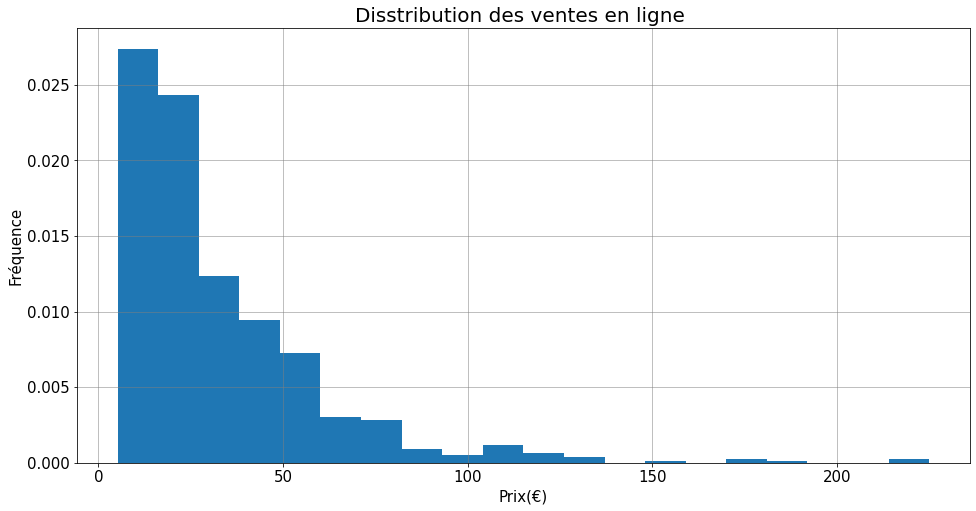

In [56]:
fig = plt.figure(figsize=(16,8))

#Histogramme
df_final["price"].hist(density=True,bins=20)


#La légende
plt.title("Disstribution des ventes en ligne ",fontsize = 20)

plt.xlabel("Prix(€)", fontsize = 15)                              

plt.xticks(fontsize=15)          
                                                 
plt.ylabel("Fréquence",fontsize=15)
plt.yticks(fontsize=15)               

#La grille
plt.grid(color='gray', linestyle='-', linewidth=0.5)

plt.show()

## La boite à moustache


Boxplot est la représentation la plus adapté pour mettre en évidence les outliers


 Ici toutes les valeurs qui dépassent de 1.5 fois l'écart inter-quartiles se trouvent en dehors de la figure et representent des outliers. Ces derniers se situent tous à droite de notre graphique et correspondent aux produits avec des prix élevés.

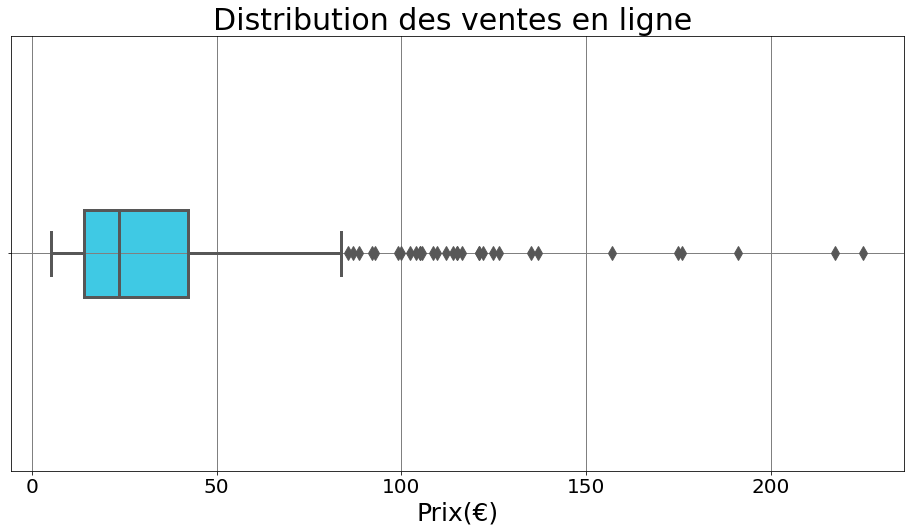

In [57]:
blue = sns.color_palette('cool_r')[5:]

fig = plt.figure(figsize=(16,8)) 
sns.boxplot(df_final.price,
            width = 0.2,
            palette = blue,
            fliersize=10,                               
            linewidth=3)                                     

plt.title("Distribution des ventes en ligne ",fontsize = 30)

plt.xlabel("Prix(€)",                              
           fontsize = 25)                                 

plt.xticks(fontsize=20)                            
                                                   

plt.grid(color='gray', linestyle='-', linewidth=1)

## Le nuage de points

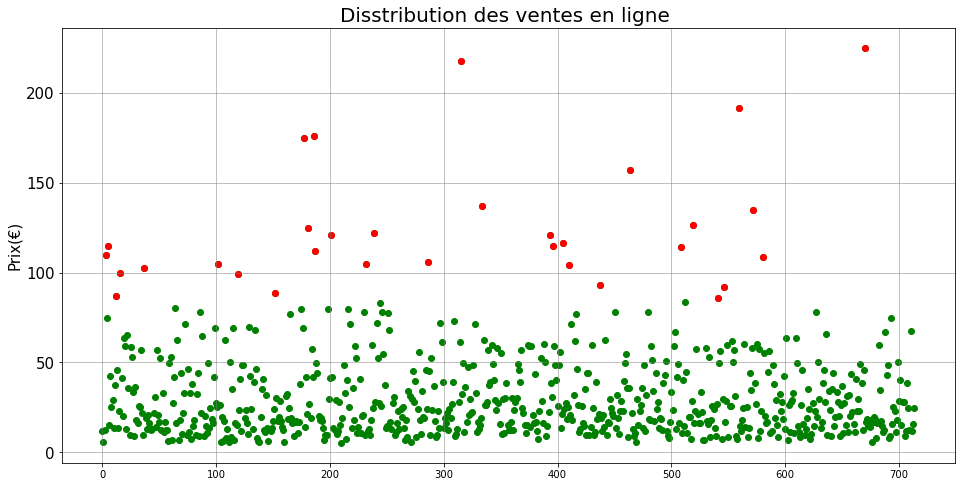

In [58]:
fig = plt.figure(figsize=(16,8))


norm = df_final[(df_final['price'] < haut) | (df_final['price'] > bas)]

plt.scatter(norm['price'].index, norm['price'].values, c='green')
plt.scatter(outlier['price'].index, outlier['price'].values,c='red')

#La légende
plt.title("Disstribution des ventes en ligne ",fontsize = 20)        
                                                 
plt.ylabel("Prix(€)",fontsize=15)
plt.yticks(fontsize=15)               

#La grille
plt.grid(color='gray', linestyle='-', linewidth=0.5)

plt.show()